In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 価値関数の計算

神戸大学大学院経済学研究科<br>
2015年度前期 経済動学講義資料<br>
2015-06-29

## Bellman 方程式

特定の条件の下で, 関数方程式

\begin{align}
    v(x) = \max_y [u(x,y) + \rho v(y)], \quad \forall x
\end{align}

の解 $v$ が

\begin{align}
    v(k_0) = \max_{(k_t)_{t \ge 0}} \sum_{t=0}^\infty \rho^t u(k_t, k_{t+1})
\end{align}

を満たします。

したがって, 関数方程式を解いて $v$ を得られれば, 

\begin{align}
    k_{t+1} \in \arg\max u(k_t, k_{t+1}) + \rho v(k_{t+1})
\end{align}

となる点列 $(k_t)_{t\ge 0}$ が最適経路であることが分かります。

関数 $k_1 \mapsto v(k_1)$ が $k_1$ から始まる最適経路の決定に必要な情報をすべてもっているので, 既知の $k_0$ を出発する最適経路を選ぶ問題は $k_1$ を最適に選ぶ問題に帰着させられるのです. 



## Bellman方程式を解析的に解けるケース

数値計算法を学ぶ理由は, 解析解を導出できないケースが多いからですが, 仮に数値計算法を実装したコードを書いても, 正しく動いていることを確認するモデルが必要です

まずは, 解析的に解けるモデルで価値関数と最適動学関数を導出しておきましょう.  

これまで例として使用していたモデル

\begin{align}
    f(k) = Ak^\alpha,
\end{align}

\begin{align}
    U(c) = \log c,
\end{align}

\begin{align}
    u(x, y) = U(f(x) - y)
\end{align}

を再び考えます. 価値関数が, 

$$v(x) = c_0 + c_1 \log x$$

と表せるとして, 係数 $c_0, c_1$ が満たすべき条件を求めてみます. 

最大化問題
$$
    \max_y \left[
        \log (Ax^\alpha - y)
        +
        \rho (c_0 + c_1 \log y)
    \right]
$$
の1次条件から, 
\begin{align}
    &\frac{-1}{Ax^\alpha - y} + \frac{\rho c_1}{y} = 0 \\
    &\Rightarrow 
    y = h(x) := \frac{\rho c_1}{1 + \rho c_1} Ax^\alpha
\end{align}
を得ます。

Bellman 方程式は

$$
    v(x) = u(x, h(x)) + v(h(x))
$$

を要請します。先ほど得た $h(x) = \frac{\rho c_1}{1 + \rho c_1} Ax^\alpha$ を代入して, パラメトライズされた関数方程式を得ます。

\begin{align}
    & \color{blue}{c_0} + \color{red}{c_1} \log x \\
    &= 
    \log \left(
        Ax^\alpha - \frac{\rho c_1}{1 + \rho c_1} Ax^\alpha
    \right)
    +
    \rho c_1 \log \left(
        \frac{\rho c_1}{1 + \rho c_1} Ax^\alpha 
    \right)\\
    &= \color{blue}{(1+\rho c_1)\log A + \rho c_0 + \rho c_1 \log \rho c_1 - (1 + \rho c_1) \log (1 + \rho c_1)}\\
    &\qquad+ \color{red}{\alpha (1 + \rho c_1)} \log x
\end{align}

任意の $x$ についてなりたつので,係数 $c_0, c_1$ には次の関係がなければなりません。

\begin{align}
    \color{blue}{c_0} 
    &= \color{blue}{(1+\rho c_1)\log A + \rho c_0 + \rho c_1 \log \rho c_1 - (1 + \rho c_1) \log (1 + \rho c_1)}\\
    \color{red}{c_1}
    &=
    \color{red}{\alpha (1 + \rho c_1)}
\end{align}

これを解くと, 

\begin{align}
    c_0 &= \frac{1}{(1-\alpha\rho)(1-\rho)} \log A + \frac{\alpha\rho}{(1 - \alpha\rho)(1 - \rho)} \log\alpha\rho
          + 
          \frac{1}{1 - \rho} \log (1 - \alpha\rho), \\
    c_1 &= \frac{\alpha}{1 - \alpha\rho}
\end{align}

を得て, 価値関数 $v(x) = c_0 + c_1 \log x$ と, 最適動学関数 $h(x) = \frac{\rho c_1}{1 + \rho c_1} x^\alpha$ が求められたことになります

これをコードにしておきます。

\begin{align}
    c_0 &= \frac{1}{(1-\alpha\rho)(1-\rho)} \log A + \frac{\alpha\rho}{(1 - \alpha\rho)(1 - \rho)} \log\alpha\rho
          + 
          \frac{1}{1 - \rho} \log (1 - \alpha\rho), \\
    c_1 &= \frac{\alpha}{1 - \alpha\rho}
\end{align}

In [1]:
def analytic_solutions(A, α, ρ):
    c0 = (1.0 / (1.0 - α * ρ) / (1.0 - ρ) * np.log(A) +
          α * ρ * np.log(α * ρ) / (1.0 - α * ρ) / (1.0 - ρ) +
          np.log(1.0 - α * ρ) / (1.0 - ρ))
    c1 = α / (1.0 - α * ρ) 
    
    def value_func(x):
        return c0 + c1 * np.log(x)
    
    def policy_func(x):
        return ρ * c1 * A * x**α / (1.0 + ρ * c1)
        
    return value_func, policy_func


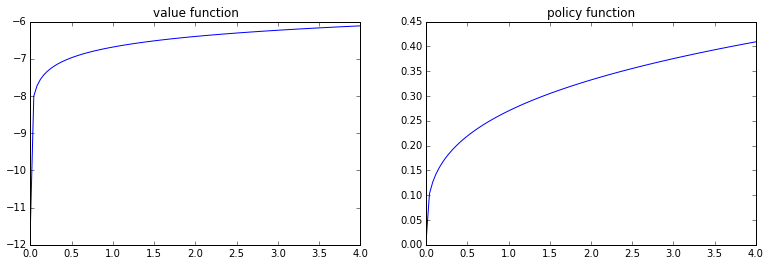

In [4]:
xpts = np.linspace(1e-5, 4.0, 100)
value, policy = analytic_solutions(1.1, 0.3, 0.9)

fig, ax = plt.subplots(1,2)
fig.set_figwidth(13)

ax[0].plot(xpts, value(xpts))
ax[0].set_title('value function')

ax[1].plot(xpts, policy(xpts))
ax[1].set_title('policy function')
plt.show()

## Value Function Iteration

価値関数の計算の背後にある方法は比較的単純で, 

Bellman作用素

\begin{align}
    & T: f \mapsto T(f) \\
    & T(f)(x) = \max_y \left\{
        u(x, y) + \rho f(y)
    \right\}
\end{align}

に対して, 縮小写像の原理

\begin{align}
    v \simeq T^n(v_0),\qquad n: \text{ large}
\end{align}

を実装すればよいです。

ただし, Bellman作用素は無限次元空間 ($V$ としておきましょう) 上の作用素です。額面通り実行することはできません

### Bellman作用素の有限次元近似

無限次元空間 $V$ の有限次元部分空間 $V_N \simeq \mathbb{R}^N$ を固定します. 

$V_N$ の基底関数 $[\phi_0, \dots, \phi_{N-1}]$ に対して, $V_N$ の元 $f$ は

$$
     f = \alpha_0 \phi_0 + \cdots + \alpha_{N-1} \phi_{N-1}
$$

と書けます

射影 $\pi_N: V \to V_N \simeq \mathbb{R}^N$ 

$$
    \pi_N f = \alpha^f_0 \phi_0 + \cdots + \alpha^f_{N-1} \phi_{N-1} 
            \leftrightarrow [\alpha^f_0, \dots, \alpha^f_{N-1}] \in \mathbb{R}^N
$$


と, 標準的埋め込み $\iota_N: \mathbb{R}^N \to V$ 

$$
    \iota_N (\alpha^f_0, \dots, \alpha^f_{N-1}) 
    = \alpha^f_0 \phi_0 + \cdots + \alpha^f_{N-1} \phi_{N-1}
$$

を使って Bellman方程式の有限次元近似します

\begin{align}
    \pi_N \circ T \circ \iota_N: \mathbb{R}^N \to \mathbb{R}^N
\end{align}

## 区分線形近似

関数空間の有限次元近似は, 基底関数とその基底がなす有限次元部分空間への射影を決定することで計算できます. 

区分線形近似を扱うときにこのような近似の一般論を意識する必要はあまりないのですが, より一般の基底関数を扱う際に役に立つことが多いので簡単に説明しておきます. 

区間 $[a, b]$ を $N$個の区間に分割します. 

$$
    a = x_0 < x_1 < \cdots < x_{N-1} < x_N = b
$$


$i = 1, 2, \dots, N$ について

$$
    \phi_i (x) = 
    \left\{
        \begin{array}{lll}
            \frac{x - x_{i-1}}{x_i - x_{i-1}} & \text{if} & x \in [x_{i-1}, x_i],\\
            \frac{x_{i+1} - x}{x_{i+1} - x_i} & \text{if} & x \in [x_i, x_{i+1}],\\
            0 & \text{otherwise} & 
        \end{array}
    \right.
$$

と定義する

**[確認]** $V$ を $\mathbb{R}$上の連続関数からなる線形空間とする. 上のように定義される $[\phi_1, \dots, \phi_N]$ が1次独立であることを確認せよ

### テント基底関数

In [5]:
from numba import vectorize, float64 

class Tent:
    def __init__(self, left, center, right):
        self.left = left
        self.center = center
        self.right = right
        
    def __call__(self, x):
        return _tent(x, self.left, self.center, self.right)

@vectorize([float64(float64, float64, float64, float64)])
def _tent(x, left, center, right):
    if left <= x < center:
        return (x - left) / (center - left)
    elif center <= x <= right:
        return (right - x) / (right - center)
    else:
        return 0.0

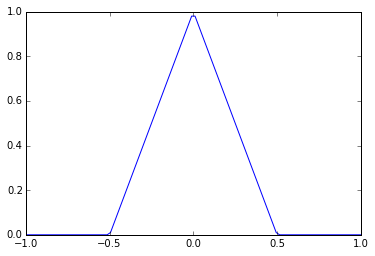

In [6]:
x = np.linspace(-1.0, 1.0, 100)
tent_function = Tent(-0.5, 0.0, 0.5)
plt.plot(x, tent_function(x))
plt.show()

### テント基底の生成

In [7]:
def tentbase(a, b, N):
    centers = np.linspace(a, b, N)
    basis = []
    for i in range(len(centers)):
        if i == 0:
            left, center, right = centers[i] - 1.0, centers[i], centers[i+1]
        elif i == len(centers) - 1:
            left, center, right = centers[i-1], centers[i], centers[-1] + 1.0
        else:
            left, center, right = centers[i-1], centers[i], centers[i+1]
        basis.append(Tent(left, center, right))
    return basis

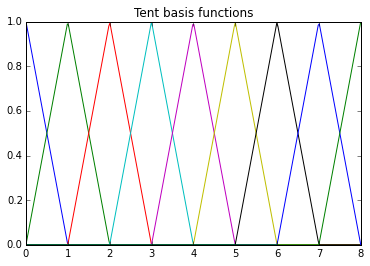

In [8]:
a, b, N = 0.0, 8.0, 9
basis = tentbase(a, b, N)
pts = np.linspace(a, b, 300)

for basis_func in basis:
    plt.plot(pts, basis_func(pts))
plt.title("Tent basis functions")
plt.show()

### 射影

関数 $f$ の区分線形近似を

$$
    f(x) \simeq f(x_0) \phi_0(x) + \cdots + f(x_{N-1}) \phi_{N-1}(x)
$$

と近似します. つまり

$$
    \pi f = [f(x_0), \dots, f(x_{N-1})]
$$

### 近似のためのクラス

基底の選び方と, 射影の取り方は個々の近似手法でことなりますが, 埋め込み $\iota$ は共通の式で書けることを思い出してください

In [9]:
class Approx:
    def __init__(self, base):
        self.base = base
        
    def proj(self, f):
        raise NonImplementedError
        
    def inj(self, coeff):
        def _inj(x):
            return np.sum([c * basis_func(x) 
                           for basis_func, c in zip(self.base, coeff)], axis=0)
        return _inj
    
    def __call__(self, f):
        return self.inj(self.proj(f))

In [10]:
class PLApprox(Approx):
    def __init__(self, a, b, N, upsample=10):
        self.a, self.b, self.N = a, b, N
        self.base = tentbase(a, b, N)
        self.centers = [basis_func.center for basis_func in self.base]
        self.grids = np.linspace(a, b, N*upsample)
        super().__init__(self.base)
    
    def proj(self, f):
        return np.array([f(basis_func.center) for basis_func in self.base])

### 補足

本当は, 無限次元作用素の有限次元近似

\begin{align}
    \pi_N \circ T \circ \iota_N
\end{align}

を有限次元の計算だけで完結できればよいのですが, 多くの場合にはそのような表現を得ることができません. 

Bellman 作用素の場合であれば, テント基底の中心 $(x_i)$ に対して

\begin{align}
    T(\iota_N \circ f)(x_j) = \max_y u(x_j, y) + \rho (\iota_N \circ f)(y), \quad j=0,\dots,N-1
\end{align}

が $(x_i)$ のどれかで達成されるということは期待できません. $y$ の自由度が無限になるので, このような計算にも離散化か最適化手法に頼る必要があります

一番素朴な方法は, グリッド数を $p$倍に細分化して, $\pi_N \circ T \circ \iota_N$ を 

\begin{align}
    T(\iota_N \circ f)(x_j) \simeq \max_{y_k} u(x_j, y_k) + \rho (\iota_N \circ f)(y_k),
    \quad j=0,\dots,N-1, \ k=0,\dots,pN-1
\end{align}
で代替する方法です. 先ほどのコードでは, このアップサンプリングされたグリッドを

    self.grids = np.linspace(a, b, N*upsample)

と表現しています. 

Bellman 方程式の右辺の最大化問題は近似グリッドから離れたところで最大値を取る可能性があるので, このようにしてグリッド間の特性を少しでも残すようにしている訳です. 


QuantEcon.net http://quant-econ.net/py/dp_intro.html では, SciPy の最適化モジュールを使ってこれを実現する方法が紹介されています. こちらも確認しておいてください.

## $N=10$

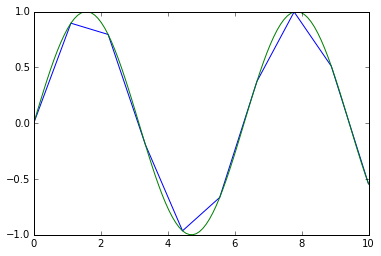

In [11]:
plapx10 = PLApprox(a=0.0, b=10.0, N=10)
approx_sin = plapx10(np.sin)

plt.plot(plapx10.grids, approx_sin(plapx10.grids))
plt.plot(plapx10.grids, np.sin(plapx10.grids))
plt.show()

## $N=100$

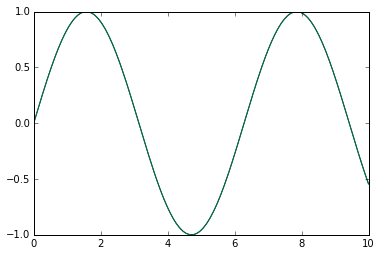

In [12]:
plapx100 = PLApprox(a=0.0, b=10.0, N=100)
approx_sin = plapx100(np.sin)

plt.plot(plapx100.grids, approx_sin(plapx100.grids))
plt.plot(plapx100.grids, np.sin(plapx100.grids))
plt.show()

## Ramsey モデル

In [13]:
class Ramsey:
    """One-sector Ramsey model"""

    def __init__(self, A, α, ρ):
        self.A, self.α, self.ρ = A, α, ρ

    def f(self, x):
        """Production function"""
        return self.A * x ** self.α

    def U(self, x):
        """Utility from consumption"""
        return np.log(x)

    def u(self, x, y):
        """Reduced form utility"""
        return self.U(self.f(x) - y)

    def is_feasible(self, x, y):
        """Checks feasibility"""
        return self.f(x) >= y

## Bellman作用素

In [14]:
def bellman_operator(model, apx):
    def _bellman_operator(w):
        wf = apx.inj(w)
        X, Y = np.meshgrid(apx.centers, apx.grids)
        with np.errstate(invalid='ignore'):
            u_val = np.where(model.is_feasible(X, Y),
                             model.u(X, Y) + model.ρ * wf(Y),
                             -np.inf)
        return np.max(u_val, axis=0)
    return _bellman_operator

In [15]:
A, α, ρ =1.1, 0.4, 0.9
ramsey = Ramsey(A, α, ρ)
value, policy = analytic_solutions(A, α, ρ)

apx = PLApprox(a=1e-5, b=0.7, N=100)
bellman = bellman_operator(ramsey, apx)

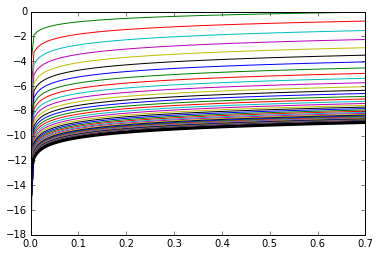

In [16]:
niter = 50

v = apx.proj(lambda x: 0.0)
for _ in range(niter):
    plt.plot(apx.centers, v)
    v = bellman(v)
plt.plot(apx.grids, value(apx.grids), color='k', linewidth=3)

## 課題

1. 数値計算した価値関数を用いて最適動学関数を計算してください
2. イテレーションの回数を決め打ちするのではなく, 終了条件が満たされたところで
   イテレーションが終了するように書き換えてください. 
3. QuantEcon.net http://quant-econ.net/py/dp_intro.html を参考にして, 
   scipy.optimize を使った近似スキームを実装してください